mobilenetV2对V1版本做了改进，改进之处为inverted residual与linear bottleneck的使用，达到了目前手机端最好的效果，同时将手机端模型用于物体检测，称为SSDLite。

本文主要贡献是是提出一个新的模块：interted residual with linear bottleneck。这个模块接收一个低维度的压缩后的特征，该特征首先被扩展到高维度，然后经过一个轻量级的深度卷积(depth-wise conv)，这些特征随后由一个linear bottlebeck投影到低维。

linear bottlenecks: 网络中某一层的特征图（所有channel）组成一个兴趣流形（manifold of interest）。一般认为网络中的兴趣流形可以被嵌入到一个低维子空间，也就是说，我们看到的特征图，他们包含的信息形成一个高维空间下的流形（如下图中的三维空间的流形，其实可以用二维坐标来表示）。 可能我们直接想到的就是降低特征的维度来减少计算量，但是当存在非线性操作时这种降维就会有问题。
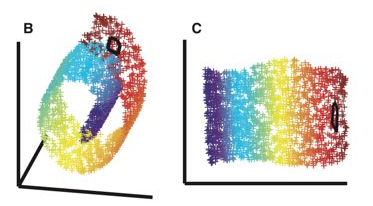

如下图所示，将低维流形映射到更高的n维空间，然后在高维空间进行非线性变换，最后再将流形映射回原空间。可以看到，当n较小时，映射回原空间的流形存在较多的信息丢失，维度较高时，信息基本被完整保留。也就是说，对低维特征图进行ReLU等非线性操作，会造成信息丢失，这也就是为什么mobilenetV1经常训废了（最终的网络参数大部分为0）。
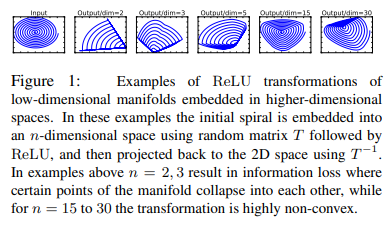

因此，作者采用linear bottleneck来解决这个问题。mobilenetV2的module是先用1x1卷积扩充维度，然后用depth-wise conv，最后再用一个bottleneck(1x1卷积)降维，所谓的linear bottleneck就是将bottleneck中的非线性激活函数去掉。

inverted residuals: inverted residual模块如下图所示，与标准残差模块有以下几点区别：<br/>
1)普通残差模块是先降维，然后做特征提取，然后升维，而inverted residual是先升维，然后做特征提取，最后降维，与普通残差是相反的，因此称为inverted residual。<br/>
2)普通残差是将输入做恒等变换add到残差网络的输出，而inverted residual由于bottlebeck层包含所有必要信息，因此是对bottleneck层的输出做shortcut。<br/>
3)普通残差是用普通卷积做特征提取，而inverted residual是用depth-wise conv做特征提取。
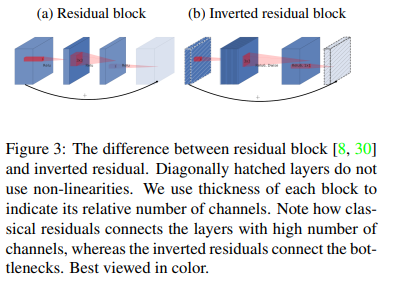

模型结构：mobilenetV2的网络结构如下表所示。采用relu6作为激活函数，因为其对低精度的计算有更强的鲁棒性。除第一层之外，我们用固定的expand rate(1x1卷积先将输入升维，此为升维的比例),选取范围一般是5-10，本文选用6。
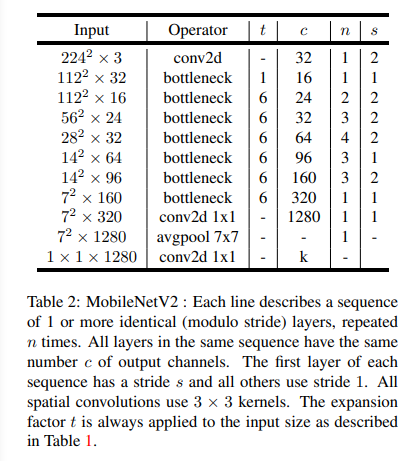